<a href="https://colab.research.google.com/github/dhanush206/Dhanush-phase-2-/blob/main/Hand_written_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 81s - 192ms/step - accuracy: 0.8890 - loss: 0.3673 - val_accuracy: 0.9228 - val_loss: 0.2747
Epoch 2/10
422/422 - 87s - 206ms/step - accuracy: 0.9601 - loss: 0.1354 - val_accuracy: 0.9895 - val_loss: 0.0401
Epoch 3/10
422/422 - 135s - 320ms/step - accuracy: 0.9688 - loss: 0.1040 - val_accuracy: 0.9878 - val_loss: 0.0421
Epoch 4/10
422/422 - 78s - 185ms/step - accuracy: 0.9735 - loss: 0.0868 - val_accuracy: 0.9903 - val_loss: 0.0379
Epoch 5/10
422/422 - 80s - 190ms/step - accuracy: 0.9763 - loss: 0.0777 - val_accuracy: 0.9917 - val_loss: 0.0364
Epoch 6/10
422/422 - 81s - 192ms/step - accuracy: 0.9786 - loss: 0.0716 - val_accuracy: 0.9910 - val_loss: 0.0374
Epoch 7/10
422/422 - 83s - 197ms/step - accuracy: 0.9814 - loss: 0.0629 - val_accuracy: 0.9922 - val_loss: 0.0322
Epoch 8/10
422/422 - 77s - 184ms/step - accuracy: 0.9828 - loss: 0.0586 - val_accuracy: 0.9908 - val_loss: 0.0367
Epoch 9/10
422/422 - 80s - 189ms/step - accuracy: 0.9832 - loss: 0.0553 - val_accuracy:

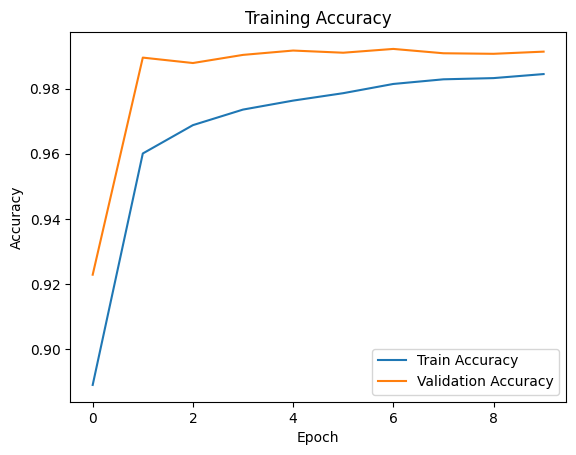

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


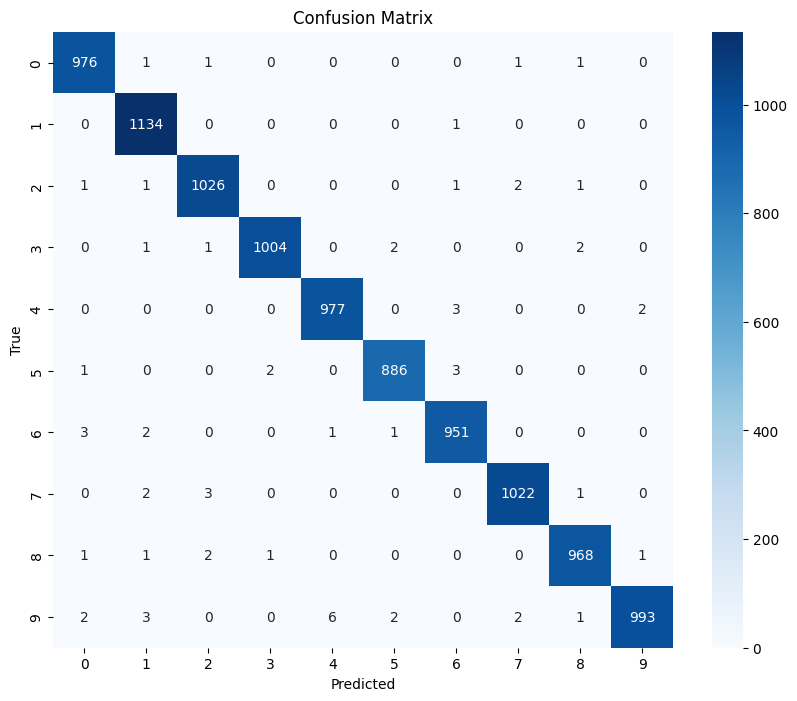

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat, validation_split=0.1, epochs=10, batch_size=128, verbose=2)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion matrix and classification report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_classes))